# Data exloration

![steam_logo](https://buy.thewitcher.com/img/shops/steam.svg)

Now that we have a good overview of our data, lets try to create a graphical representation of them. As computed previously, we are now equiped with a rating metric for our games that can be used to create our graph.
Since we are interested by the success of a game in this part, we will only use the games that have more than 200000 owners.

In [80]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx

# third-party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# customisations
pd.set_option("max_columns", 100)
plt.style.use('default')
plt.rcdefaults()

%matplotlib inline

In [81]:
df = pd.read_csv('./data/steam_ready.csv')

data = df[df.owners > 200000].copy()

data = data.reset_index(drop=True)
data.head()

,appid,name,release_date,developer,publisher,required_age,genres,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,economic_success,total_ratings,rating_ratio,rating,release_year,multi_player,single_player,action,adventure,casual,indie,massively_multiplayer,rpg,racing,simulation,sports,strategy,type
0,10,Counter-Strike,2000-11-01,Valve,Valve,0,Action,0,144225,3752,10480,149,2000000,10.5,36750000.0,147977,0.974645,96.111053,2000,1,0,1,0,0,0,0,0,0,0,0,0,Paid
1,20,Team Fortress Classic,1999-04-01,Valve,Valve,0,Action,0,3805,711,1342,24,2000000,5.0,17500000.0,4516,0.842560,80.911325,1999,1,0,1,0,0,0,0,0,0,0,0,0,Paid
2,30,Day of Defeat,2003-05-01,Valve,Valve,0,Action,0,3906,467,1501,29,5000000,5.0,37500000.0,4373,0.893208,85.740618,2003,1,0,1,0,0,0,0,0,0,0,0,0,Paid
3,50,Half-Life: Opposing Force,1999-11-01,Gearbox Software,Valve,0,Action,0,6520,358,2180,181,1000000,5.0,7500000.0,6878,0.947950,91.479528,1999,1,1,1,0,0,0,0,0,0,0,0,0,Paid
4,70,Half-Life,1998-11-08,Valve,Valve,0,Action,0,36055,1308,1396,197,2000000,10.5,36750000.0,37363,0.964992,94.471303,1998,1,1,1,0,0,0,0,0,0,0,0,0,Paid


We now have a subset of 1175 games that we can use ton compute our graphs. This may seem like it will be unsignificant but is a good start to identify what are the best network parameters to use to vizualize what is a good game all about.

In [35]:
num_nodes = len(data)
print(num_nodes)

1175


Now, we can build our adjacency matrix based on the ratings provided by steam. and the rating ratio.

# Graph 1 : Paid and Free

In this part, we wll be creating an adjacency matrix of 1 and 0 depending on wether or not a game is free or not. For this, we will have a weight of 1 if two games are both free or paid.

In [42]:
game_type1 = np.zeros((num_nodes,num_nodes))

free_games = np.array(data['type']=='Free')*1
paid_games = np.array(data['type']=='Paid')*1

for row in range(num_nodes):
    for row2 in range(num_nodes):
        if free_games[row] == free_games[row2]:
            game_type1[row, row2] = 1
        else:
            game_type1[row, row2] = 0

This way of creating a graph will create 2 clusters (one for the paid and free games). However, we can realize on the graph below that the adjacency matrix is really filled which shows that each cluster will be fulls connected.

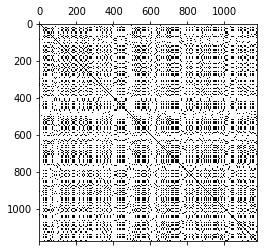

In [60]:
game_type1 = game_type2 - np.eye(num_nodes)

plt.spy(game_type1)

In [61]:
graph1 = nx.from_numpy_array(game_type)
nodes1 = data[['average_playtime', 'rating', 'owners', 'economic_success']]#data[['name', 'developer','genres','average_playtime', 'rating', 'owners', 'economic_success']]

In [45]:
node_props = nodes1.to_dict()
for key in node_props:
    # print(key, node_props[key])
    nx.set_node_attributes(graph1, node_props[key], key)

In [46]:
graph1.nodes[1]

{'average_playtime': 1342,
 'rating': 80.91132452635408,
 'owners': 2000000,
 'economic_success': 17500000.0}

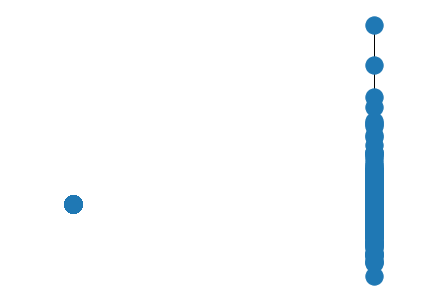

In [41]:
nx.draw_spectral(graph1)

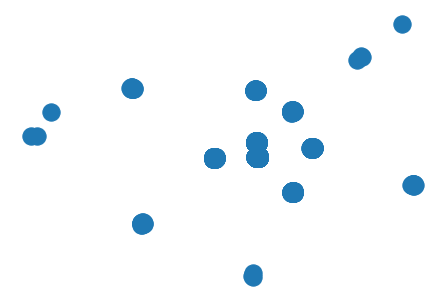

In [34]:
nx.draw_spring(graph1)

In [33]:
nx.write_gexf(graph1, 'graphs/paid_vs_free.gexf')

# Graph 2 : Paid and Free and owners

- We wll be creating an adjacency matrix of 1 and 0 depending on wether or not a game is free or not. For this, we will have a weight of 1 if two games are both free or paid. 
- However, we will also cluster the games depending on their number of owners. This way, we will obtain some giant clusters for each group of paid and free games and inner class cluster depending on the number of owners per game. 
- The idea here is to be able to clearyl see if their is a the influence of a genre (for exemple) depending on the number of owners for each type of game.

In [52]:
game_type2 = np.zeros((num_nodes,num_nodes))

free_games = np.array(data['type']=='Free')*1
paid_games = np.array(data['type']=='Paid')*1

for row in range(num_nodes):
    for row2 in range(num_nodes):
        if free_games[row] == free_games[row2] and (data.loc[row,'owners'] == data.loc[row2,'owners']):
            game_type2[row, row2] = 1
        else:
            game_type2[row, row2] = 0

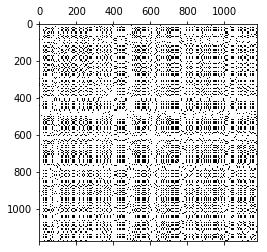

In [53]:
game_type2 = game_type2 - np.eye(num_nodes)

plt.spy(game_type2)

In [54]:
graph2 = nx.from_numpy_array(game_type)
nodes2 = data[['average_playtime', 'rating', 'publisher', 'owners', 'economic_success']]#data[['name', 'developer','genres','average_playtime', 'rating', 'owners', 'economic_success']]

In [55]:
node_props = nodes2.to_dict()
for key in node_props:
    # print(key, node_props[key])
    nx.set_node_attributes(graph2, node_props[key], key)

In [56]:
graph2.nodes[1]

{'average_playtime': 1342,
 'rating': 80.91132452635408,
 'owners': 2000000,
 'economic_success': 17500000.0}

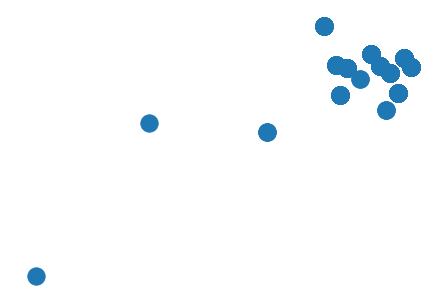

In [57]:
nx.draw_spectral(graph2)

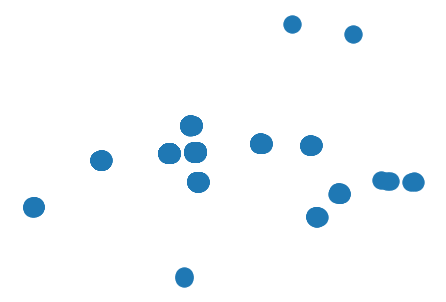

In [58]:
nx.draw_spring(graph2)

In [59]:
nx.write_gexf(graph2, 'graphs/paid_vs_free_owners.gexf')

# Graph 3 : Type of games

- In here, we will be connecting each game depending on its category (example : action, fps, etc...). There will be a value a 1 between each game that share the same category.

In [65]:
game_type3 = np.zeros((num_nodes,num_nodes))


categories = ['single_player', 'multi_player','adventure', 'action', 'casual', 'indie', 'massively_multiplayer', 'rpg', 'racing', 'simulation', 'sports','strategy' ]

for category in categories:
    for row in range(num_nodes):
        for row2 in range(num_nodes):
            if (data.loc[row,category] == data.loc[row2,category]):
                game_type3[row, row2] = 1

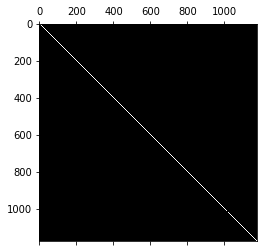

In [66]:
game_type3 = game_type3 - np.eye(num_nodes)

plt.spy(game_type3)

We realized here that the graph is really similar to a fully connected one in this case. This makes sense beacuse games have many different categories andour condition for linking two games between each other is to have at least one category in common. 

To solve this problem, we defined a super category which is to know wehter a game is single player and/or multiplayer. We will first segregate our games between those two catgories to see how our adjacency matrix changed.

In [67]:
game_type3 = np.zeros((num_nodes,num_nodes))

super_categories = ['single_player', 'multi_player' ]

for category in super_categories:
    for row in range(num_nodes):
        for row2 in range(num_nodes):
            if (data.loc[row,category] == data.loc[row2,category]):
                game_type3[row, row2] = 1

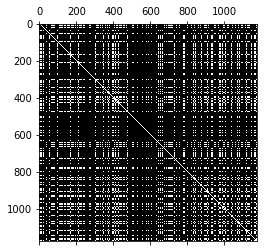

In [69]:
game_type3 = game_type3 - np.eye(num_nodes)

plt.spy(game_type3)

This is a little bit better. However, there is still a lot of connexions between the nodes. Lets use both the super category and the ctegories this time !!

In [70]:
game_type3 = np.zeros((num_nodes,num_nodes))

super_categories = ['single_player', 'multi_player' ]
categories = ['adventure', 'action', 'casual', 'indie', 'massively_multiplayer', 'rpg', 'racing', 'simulation', 'sports','strategy' ]

for category in super_categories:
    for row in range(num_nodes):
        for row2 in range(num_nodes):
            if (data.loc[row,category] == data.loc[row2,category]) and (data.loc[row,'single_player'] == data.loc[row2,'single_player'] or data.loc[row,'multi_player'] == data.loc[row2,'multi_player']):
                game_type3[row, row2] = 1

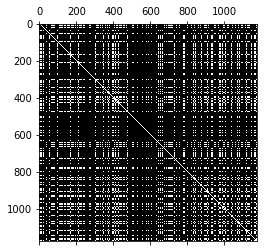

In [71]:
game_type3 = game_type3 - np.eye(num_nodes)

plt.spy(game_type3)

In [72]:
graph3 = nx.from_numpy_array(game_type)
nodes3 = data[['average_playtime', 'rating', 'publisher', 'owners', 'economic_success']]#data[['name', 'developer','genres','average_playtime', 'rating', 'owners', 'economic_success']]

In [74]:
node_props = nodes3.to_dict()
for key in node_props:
    # print(key, node_props[key])
    nx.set_node_attributes(graph3, node_props[key], key)

In [75]:
graph3.nodes[1]

{'average_playtime': 1342,
 'rating': 80.91132452635408,
 'publisher': 'Valve',
 'owners': 2000000,
 'economic_success': 17500000.0}

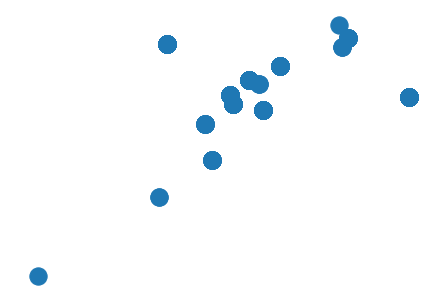

In [76]:
nx.draw_spectral(graph3)

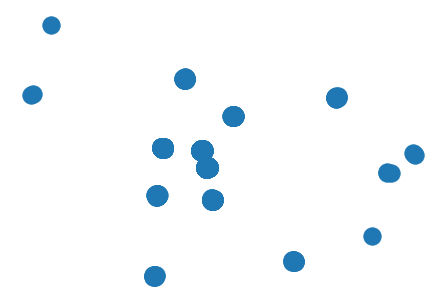

In [78]:
nx.draw_spring(graph3)

In [79]:
nx.write_gexf(graph3, 'graphs/categories.gexf')

# Old stuff

In [48]:
def epsilon_similarity_graph(X: np.ndarray, sigma=1, epsilon=0):
    """ X (n x d): coordinates of the n data points in R^d.
        sigma (float): width of the kernel
        epsilon (float): threshold
        Return:
        adjacency (n x n ndarray): adjacency matrix of the graph.
    """
    sq_dist = pdist(X)
    pairwise_dists = squareform(sq_dist)**2
    adjacency = np.exp( -pairwise_dists / sigma**2 / 2) - np.identity(len(pairwise_dists))
    threshold = adjacency<epsilon
    
    adjacency[threshold]=0
    
    return adjacency

In [49]:
X = data['rating']

In [50]:
Y= np.array([X,X]).T

In [51]:
Y

array([[96.11105296, 96.11105296],
       [80.91132453, 80.91132453],
       [85.74061791, 85.74061791],
       ...,
       [90.77948182, 90.77948182],
       [64.46466949, 64.46466949],
       [42.97685959, 42.97685959]])

In [ ]:
sigma = np.std(pdist(Y))
print(f'The value of sigma is {sigma}')

In [ ]:
adjacency = epsilon_similarity_graph(X=Y, sigma=sigma, epsilon=0)
plt.hist(adjacency.flatten())

In [ ]:
epsilon = 0.4
adjacency = epsilon_similarity_graph(Y,sigma,epsilon)
plt.spy(adjacency)
plt.show()

In [ ]:
graph = nx.from_numpy_array(adjacency)

In [ ]:
nodes = data[['name', 'developer','genres','average_playtime', 'type']]

In [ ]:
node_props = nodes.to_dict()
nodes

In [ ]:
for key in node_props:
    # print(key, node_props[key])
    nx.set_node_attributes(graph, node_props[key], key)

In [ ]:
nx.write_gexf(graph, 'first.gexf')